In [20]:
!pip install geopy
!pip install folium

In [21]:
import pandas as pd 
import numpy as np 
from geopy.geocoders import Nominatim
import folium
import json 
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [22]:
CLIENT_ID = 'DGXI5NPQD2QYSNXIVCQE1DE1GZEME5ZCWW10NI5ADHBX5S3C' # your Foursquare ID
CLIENT_SECRET = 'UQ2QHC351QXVF0A5HMXE5WCYGCDKAWYPR3LA52SZGPTY3TJN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=100
RADIUS=250

In [25]:
near = 'Manhattan, NY'
categoryID='4bf58dd8d48988d1fa931735'

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    near,
    LIMIT,
    categoryID
    )
url


'https://api.foursquare.com/v2/venues/explore?&client_id=DGXI5NPQD2QYSNXIVCQE1DE1GZEME5ZCWW10NI5ADHBX5S3C&client_secret=UQ2QHC351QXVF0A5HMXE5WCYGCDKAWYPR3LA52SZGPTY3TJN&v=20180605&near=Manhattan, NY&limit=100&categoryId=4bf58dd8d48988d1fa931735'

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f794ef49cc99e0bae3b83f0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'geocode': {'what': '',
   'where': 'manhattan ny',
   'center': {'lat': 40.78343, 'lng': -73.96625},
   'displayString': 'Manhattan, NY, United States',
   'cc': 'US',
   'geometry': {'bounds': {'ne': {'lat': 40.882214, 'lng': -73.907},
     'sw': {'lat': 40.679548, 'lng': -74.047285}}},
   'slug': 'manhattan-manhattan-new-york-united-states',
   'longId': '72057594043053707'},
  'headerLocation': 'Manhattan',
  'headerFullLocation': 'Manhattan',
  'headerLocationGranularity': 'city',
  'query': 'hotel',
  'totalResults': 318,
  'suggestedBounds': {'ne': {'lat': 40.78542428451348,
    'lng': -73.96080664244161},
   'sw': {'lat': 40.72003842521691, 'lng': -74.0118312797529}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'rea

In [27]:
hotels = results['response']['groups'][0]['items']
#hotels = results['response']['venues']
    
manhattan_hotels_raw = json_normalize(hotels) # flatten JSON
manhattan_hotels_raw
manhattan_hotels = manhattan_hotels_raw[['venue.id','venue.name','venue.location.lat','venue.location.lng']]
manhattan_hotels.columns = [col.split(".")[-1] for col in manhattan_hotels.columns]
manhattan_hotels

,id,name,lat,lng
0,49d18dfdf964a5208f5b1fe3,The Plaza Hotel,40.764519,-73.974488
1,5093c236830214706abb75db,citizenM Hotel New York Times Square,40.761691,-73.984953
2,4ae6f117f964a520a6a721e3,The NoMad Hotel,40.744981,-73.988819
3,4bec60a5f909ef3b2808a9c6,Kimpton Hotel Eventi,40.747224,-73.989960
4,4a0e0f85f964a520bf751fe3,Ace Hotel New York,40.745858,-73.988121
5,4a67bbd8f964a520f9c91fe3,The Peninsula New York,40.761658,-73.975384
6,438d6b12f964a520322b1fe3,W New York - Times Square,40.759296,-73.985573
7,4ae0fa2ff964a5203d8421e3,Mandarin Oriental,40.768987,-73.983017
8,4a9f2ec3f964a520d73c20e3,"Ink48 , A Kimpton Hotel",40.764505,-73.995987
9,4b58b0a5f964a520d66528e3,Distrikt Hotel,40.756707,-73.992873


In [29]:
venues_list=[]
for hotelID, hotelName, hotelLat, hotelLng  in zip(manhattan_hotels['id'],manhattan_hotels['name'],manhattan_hotels['lat'],manhattan_hotels['lng']):
    #print(venueID, name, hotelLat, hotelLng)
    
    #url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
    #    venueID,
    #    CLIENT_ID, 
    #    CLIENT_SECRET, 
    #    VERSION)
    #---------------------------------------------------------------------
    categoryID='4d4b7104d754a06370d81259'
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}&radius={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        hotelLat,
        hotelLng,
        LIMIT,
        RADIUS,
        categoryID
        )
    url
    #print(url)
    results = requests.get(url).json()
    art_ent_venues=results['response']['groups'][0]['items']
    art_ent_venues_df = json_normalize(art_ent_venues) 
    #---------------------------------------------------------------------
    categoryID='4d4b7105d754a06374d81259'                
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}&radius={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        hotelLat,
        hotelLng,
        LIMIT,
        RADIUS,
        categoryID
        )
    url
    #print(url)
    results = requests.get(url).json()
    food_venues=results['response']['groups'][0]['items']
    food_venues_df = json_normalize(food_venues) 
    #---------------------------------------------------------------------
    categoryID='4d4b7105d754a06376d81259'
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}&radius={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        hotelLat,
        hotelLng,
        LIMIT,
        RADIUS,
        categoryID
        )
    url
    #print(url)
    results = requests.get(url).json()
    nightlife_venues=results['response']['groups'][0]['items']
    nightlife_venues_df = json_normalize(nightlife_venues) 
    #---------------------------------------------------------------------
    
    #break
    
    venues_list.append([(hotelID,art_ent_venues_df.shape[0],food_venues_df.shape[0],nightlife_venues_df.shape[0])])
    #print (results)

venues_list_df = pd.DataFrame([item for venue_list in venues_list for item in venue_list])  
venues_list_df.columns = ['id', 
                  'num_of_art_ent_venues', 
                  'num_of_food_venues', 
                  'num_of_nightlife_venues']
venues_list_df 

,id,num_of_art_ent_venues,num_of_food_venues,num_of_nightlife_venues
0,49d18dfdf964a5208f5b1fe3,33,49,16
1,5093c236830214706abb75db,70,34,35
2,4ae6f117f964a520a6a721e3,33,42,26
3,4bec60a5f909ef3b2808a9c6,20,34,33
4,4a0e0f85f964a520bf751fe3,31,52,45
5,4a67bbd8f964a520f9c91fe3,41,36,24
6,438d6b12f964a520322b1fe3,100,27,34
7,4ae0fa2ff964a5203d8421e3,21,40,16
8,4a9f2ec3f964a520d73c20e3,2,25,11
9,4b58b0a5f964a520d66528e3,51,30,26


In [30]:
manhattan_hotels=pd.merge(manhattan_hotels, venues_list_df, on='id')
manhattan_hotels

,id,name,lat,lng,num_of_art_ent_venues,num_of_food_venues,num_of_nightlife_venues
0,49d18dfdf964a5208f5b1fe3,The Plaza Hotel,40.764519,-73.974488,33,49,16
1,5093c236830214706abb75db,citizenM Hotel New York Times Square,40.761691,-73.984953,70,34,35
2,4ae6f117f964a520a6a721e3,The NoMad Hotel,40.744981,-73.988819,33,42,26
3,4bec60a5f909ef3b2808a9c6,Kimpton Hotel Eventi,40.747224,-73.989960,20,34,33
4,4a0e0f85f964a520bf751fe3,Ace Hotel New York,40.745858,-73.988121,31,52,45
5,4a67bbd8f964a520f9c91fe3,The Peninsula New York,40.761658,-73.975384,41,36,24
6,438d6b12f964a520322b1fe3,W New York - Times Square,40.759296,-73.985573,100,27,34
7,4ae0fa2ff964a5203d8421e3,Mandarin Oriental,40.768987,-73.983017,21,40,16
8,4a9f2ec3f964a520d73c20e3,"Ink48 , A Kimpton Hotel",40.764505,-73.995987,2,25,11
9,4b58b0a5f964a520d66528e3,Distrikt Hotel,40.756707,-73.992873,51,30,26


In [31]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

X = manhattan_hotels.values[:,4:]
#X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset
#X

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.02135491,  1.29724048, -0.50968096],
       [ 1.48456189, -0.04104062,  1.21959374],
       [ 0.02135491,  0.6727093 ,  0.40046361],
       [-0.49274484, -0.04104062,  1.03756482],
       [-0.05773736,  1.5648967 ,  2.12973831],
       [ 0.33772399,  0.13739686,  0.2184347 ],
       [ 2.67094593, -0.6655718 ,  1.12857928],
       [-0.4531987 ,  0.49427182, -0.50968096],
       [-1.20457526, -0.84400928, -0.96475325],
       [ 0.73318533, -0.39791558,  0.40046361],
       [-0.37410643, -1.46854046, -1.51084   ],
       [-0.76956778,  0.04817812, -0.60069542],
       [-1.00684458, -2.27150912, -1.41982554],
       [-0.57183711,  0.04817812,  0.8555359 ],
       [-0.76956778, -0.6655718 ,  0.2184347 ],
       [ 0.61454693,  1.118803  , -0.41866651],
       [ 1.08910054,  0.31583434,  1.21959374],
       [-1.08593685, -0.93322802, -1.14678217],
       [ 0.5750008 , -0.39791558,  0.03640578],
       [-0.65092937, -0.48713432, -0.50968096],
       [-0.92775232, -0.04104062,  0.036

1
300.0
2
193.19763406565954
3
131.41666553521017
4
96.27740195552803
5
79.81033652394603
6
68.1556868237811
7
60.47113639268711
8
54.71043607080918
9
49.50329468627176
10
44.954921505454365
11
40.52729641433192
12
37.62201350770508
13
35.25815339271375
14
31.583501327205298


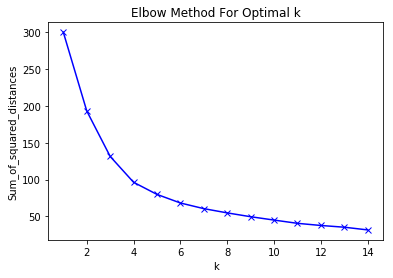

In [32]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_dataset)
    Sum_of_squared_distances.append(km.inertia_)
    print(k)
    print(km.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [37]:
num_clusters = 4

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 1 0 0 2 0 1 0 3 1 3 0 3 0 0 0 1 3 0 0 0 0 1 1 2 2 1 0 0 2 1 0 1 3 2 2 0
 3 0 1 1 0 1 0 0 0 3 3 0 3 1 1 0 0 2 2 3 3 2 2 0 1 0 3 1 3 3 3 2 0 3 3 0 3
 0 2 3 0 0 2 1 2 0 2 0 1 3 2 2 0 0 0 0 2 3 0 0 3 0 3]


In [38]:
manhattan_hotels["Labels"] = labels
manhattan_hotels

,id,name,lat,lng,num_of_art_ent_venues,num_of_food_venues,num_of_nightlife_venues,Labels
0,49d18dfdf964a5208f5b1fe3,The Plaza Hotel,40.764519,-73.974488,33,49,16,0
1,5093c236830214706abb75db,citizenM Hotel New York Times Square,40.761691,-73.984953,70,34,35,1
2,4ae6f117f964a520a6a721e3,The NoMad Hotel,40.744981,-73.988819,33,42,26,0
3,4bec60a5f909ef3b2808a9c6,Kimpton Hotel Eventi,40.747224,-73.989960,20,34,33,0
4,4a0e0f85f964a520bf751fe3,Ace Hotel New York,40.745858,-73.988121,31,52,45,2
5,4a67bbd8f964a520f9c91fe3,The Peninsula New York,40.761658,-73.975384,41,36,24,0
6,438d6b12f964a520322b1fe3,W New York - Times Square,40.759296,-73.985573,100,27,34,1
7,4ae0fa2ff964a5203d8421e3,Mandarin Oriental,40.768987,-73.983017,21,40,16,0
8,4a9f2ec3f964a520d73c20e3,"Ink48 , A Kimpton Hotel",40.764505,-73.995987,2,25,11,3
9,4b58b0a5f964a520d66528e3,Distrikt Hotel,40.756707,-73.992873,51,30,26,1


In [39]:
import folium # map rendering library
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_hotels['lat'], manhattan_hotels['lng'], manhattan_hotels['name'], manhattan_hotels['Labels']):
    label = folium.Popup(str(poi) + '( Cluster ' + str(cluster) + ')', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
        
map_clusters

In [40]:
manhattan_hotels_grouped = manhattan_hotels.groupby('Labels').mean().reset_index()
manhattan_hotels_grouped

,Labels,lat,lng,num_of_art_ent_venues,num_of_food_venues,num_of_nightlife_venues
0,0,40.752463,-73.984131,23.000000,36.731707,20.951220
1,1,40.756813,-73.989170,76.944444,31.944444,26.777778
2,2,40.750741,-73.985681,27.722222,49.666667,34.722222
3,3,40.757904,-73.980874,18.217391,20.478261,8.434783


In [41]:
manhattan_hotels.loc[manhattan_hotels['Labels']==1]

,id,name,lat,lng,num_of_art_ent_venues,num_of_food_venues,num_of_nightlife_venues,Labels
1,5093c236830214706abb75db,citizenM Hotel New York Times Square,40.761691,-73.984953,70,34,35,1
6,438d6b12f964a520322b1fe3,W New York - Times Square,40.759296,-73.985573,100,27,34,1
9,4b58b0a5f964a520d66528e3,Distrikt Hotel,40.756707,-73.992873,51,30,26,1
16,4d7ad1263fbf6dcbb60b6423,Sanctuary Hotel New York,40.758358,-73.983262,60,38,35,1
22,4c2cdf2d8ef52d7fed9933ba,InterContinental New York Times Square,40.758682,-73.989392,100,29,12,1
23,4ab79e30f964a520397a20e3,Crowne Plaza Times Square Manhattan,40.760742,-73.985064,90,27,28,1
26,439c437bf964a520f02b1fe3,New York Marriott Marquis,40.758725,-73.986243,100,33,31,1
30,4a0215c6f964a5202a711fe3,Millennium Broadway Hotel,40.757073,-73.984800,69,36,38,1
32,515a1b3ee4b0f84f522c4b7f,The High Line Hotel,40.745924,-74.005389,94,18,6,1
39,50eab63be4b09d1aedfe4e75,Hyatt Centric Times Square New York,40.757396,-73.984222,65,39,39,1
